In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from wfdb import processing
import wfdb
import h5py
import scipy
import os
import glob

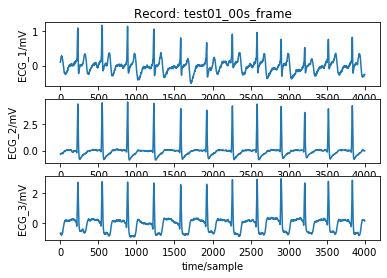

In [2]:
# Load the wfdb record and the physical samples
record = wfdb.rdrecord('sample-data/test01_00s_frame')
wfdb.plot_wfdb(record)

In [3]:
# Load the wfdb record and the physical samples
record = wfdb.rdrecord('sample-data/test01_00s_frame', smooth_frames=False)
display(record.e_p_signal)
print([len(s) for s in record.e_p_signal])

[array([ 0.1 ,  0.11,  0.13, ..., -0.27, -0.27, -0.26]),
 array([-0.08, -0.57, -0.06, ...,  0.13, -0.18,  0.12]),
 array([-0.66, -0.66, -0.67, ...,  0.15,  0.15,  0.16])]

[4000, 8000, 4000]


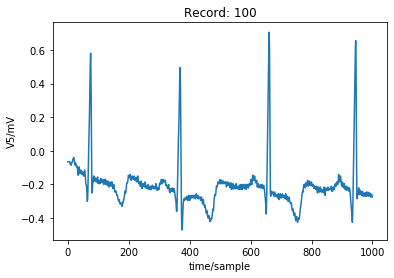

In [4]:
# Load the wfdb record and the physical samples
record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=1000, channels=[1])
wfdb.plot_wfdb(record)

========================================================================================

(283, 1, 360)


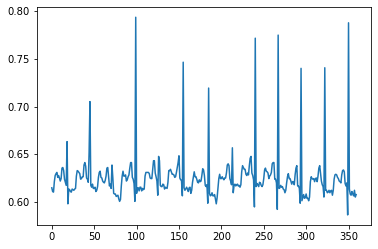

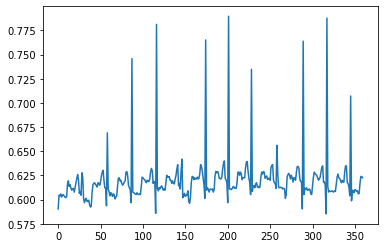

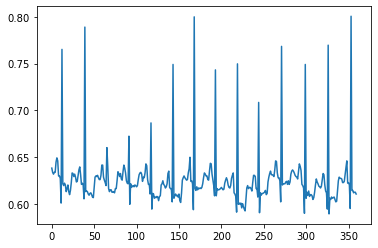

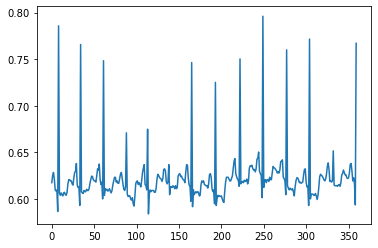

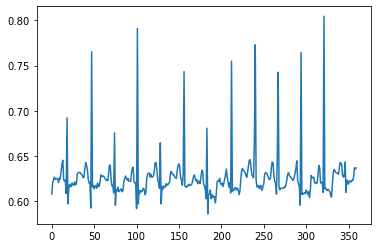

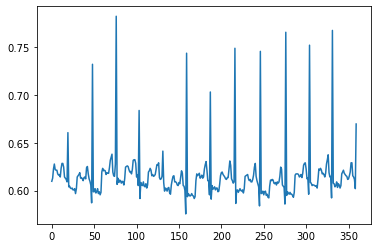

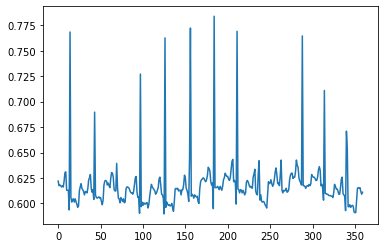

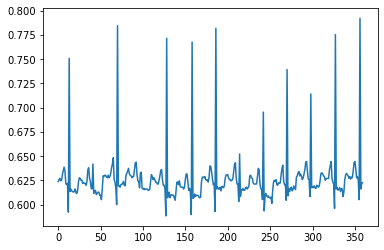

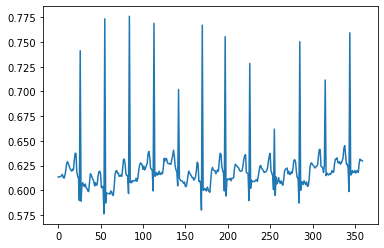

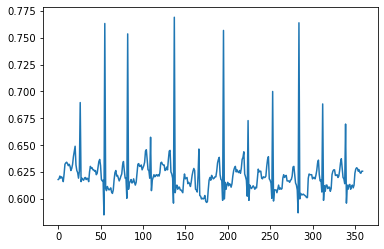

In [5]:
#arr = os.listdir('/home/aabbasloo/Desktop/dnn/LSTMGAN/MLII/1 NSR/')
arr = []
for file in glob.glob('/home/aabbasloo/Desktop/dnn/LSTMGAN/MLII/1 NSR/*.mat'):
    arr.append(file) 
#print (arr)   

arr = sorted(arr, key=lambda x:x[:])

l = 283
ll = 1
d = 3600
stride = 10
data = []
for i in range(l):
    #print (arr[i])
    db = scipy.io.loadmat(arr[i])    
    for j in range(ll):
        data.append(db['val'][0, j*d:(j+1)*d])
data = np.array(data).reshape(l*ll, 1, d)    
seq_in = data[:, :, ::stride]
seq_in = seq_in/np.amax(seq_in)
print (seq_in.shape)  
for i in range(10):
    plt.figure()
    plt.plot(seq_in[i, 0, :])

10
(10, 1, 360)


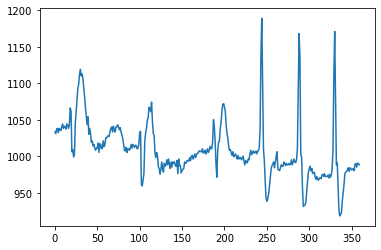

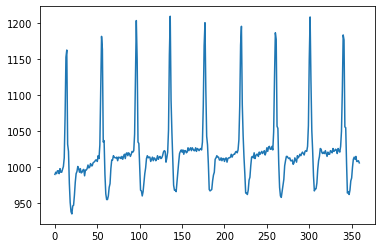

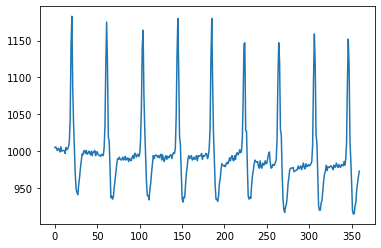

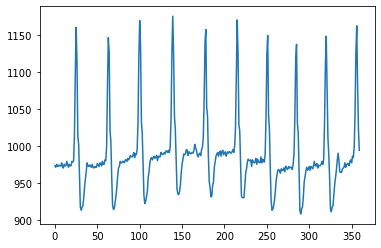

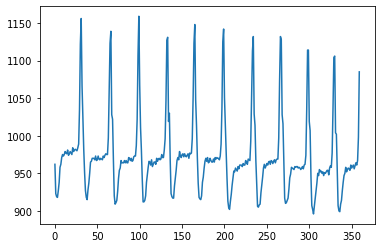

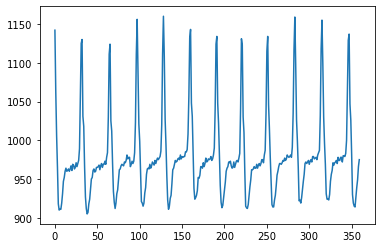

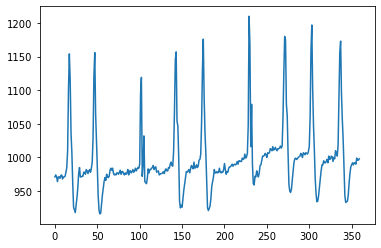

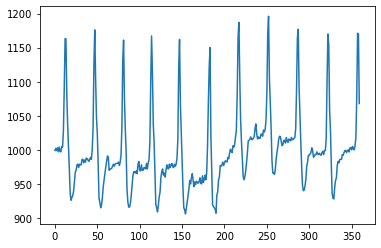

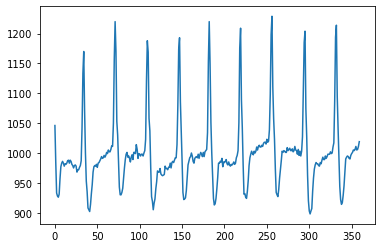

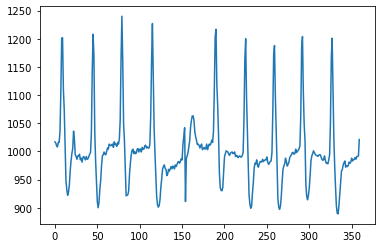

In [6]:
#arr = os.listdir('/home/aabbasloo/Desktop/dnn/LSTMGAN/MLII/1 NSR/')
arr = []
for file in glob.glob('/home/aabbasloo/Desktop/dnn/LSTMGAN/MLII/11 IVR/*.mat'):
    arr.append(file) 
print (len(arr))   

arr = sorted(arr, key=lambda x:x[:])

l = 10
ll = 1
d = 3600
stride = 10
data = []
for i in range(l):
    #print (arr[i])
    db = scipy.io.loadmat(arr[i])    
    for j in range(ll):
        data.append(db['val'][0, j*d:(j+1)*d])
data = np.array(data).reshape(l*ll, 1, d)    
seq_test = data[:, :, ::stride]
seq_test = seq_test/np.amax(seq_in)
print (seq_test.shape)  
for i in range(10):
    plt.figure()
    plt.plot(seq_test[i, 0, :])

In [7]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
seq_shape = (1, np.int(d/stride))
input = Input(shape=seq_shape) 

en = LSTM(512, return_sequences=True)(input)
en = Bidirectional(LSTM(512))(en)
en = Dense(512)(en)
en = LeakyReLU(alpha=0.2)(en)
en = Dense(256)(en)
en = LeakyReLU(alpha=0.2)(en)

de = Dense(128)(en)
de = LeakyReLU(alpha=0.2)(de)
de = BatchNormalization(momentum=0.8)(de)
de = Dense(256)(de)
de = LeakyReLU(alpha=0.2)(de)
de = BatchNormalization(momentum=0.8)(de)
de = Dense(512)(de)
de = LeakyReLU(alpha=0.2)(de)
de = BatchNormalization(momentum=0.8)(de)
de = Dense(np.prod(seq_shape), activation='tanh')(de)
de = Reshape(seq_shape)(de)

autoencoder = Model(input, de)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(seq_in, seq_in, epochs=100, verbose=0)

W0807 11:54:08.426249 140637075003200 deprecation_wrapper.py:119] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 11:54:08.443135 140637075003200 deprecation_wrapper.py:119] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 11:54:08.447403 140637075003200 deprecation_wrapper.py:119] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 11:54:09.567580 140637075003200 deprecation_wrapper.py:119] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 360)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 512)            1787904   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
__________

W0807 11:54:10.580075 140637075003200 deprecation.py:323] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 11:54:11.968094 140637075003200 deprecation_wrapper.py:119] From /home/aabbasloo/miniconda3/envs/RESOURCES/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [9]:
encoder = Model(input, en)
z_in = encoder.predict(seq_in)
min = np.zeros((256))
max = np.zeros((256))
for i in range(256):
    max[i] = np.amax(z_in[:, i])
    min[i] = np.amin(z_in[:, i])
print (z.shape)

z_test = encoder.predict(seq_test)
print (z_test.shape)

NameError: name 'z' is not defined

In [ ]:
from sklearn.manifold import TSNE
z = np.append(z_in, z_test, axis=0)
z_embedded = TSNE(n_components=2).fit_transform(z)
plt.figure()
plt.scatter(z_embedded[0:283,0], z_embedded[0:283,1])
plt.scatter(z_embedded[283:,0], z_embedded[283:,1])

In [ ]:
class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (1, self.seq_length)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequences
        z = Input(shape=(self.latent_dim,))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_discriminator(self):

        model = Sequential()
        model.add(LSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(LSTM(512)))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)
      
    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.seq_shape), activation='tanh'))
        model.add(Reshape(self.seq_shape))
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        seq = model(noise)

        return Model(noise, seq)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load and convert the data
        X_train = seq_in

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        # Training the model
        for epoch in range(epochs):

            # Training the discriminator
            # Select a random batch of note sequences
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_seqs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim)) 

            # Generate a batch of new note sequences
            gen_seqs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
            d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            #  Training the Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim)) 

            # Train the generator (to have the discriminator label samples as real)
            g_loss = self.combined.train_on_batch(noise, real)

            # Print the progress and save into loss lists
            if epoch % sample_interval == 0:
              print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
              self.disc_loss.append(d_loss[0])
              self.gen_loss.append(g_loss)
        self.plot_loss()            
            
    def plot_loss(self):
        
        plt.plot(self.disc_loss, c='red')
        plt.plot(self.gen_loss, c='blue')
        plt.title("GAN Loss per Epoch")
        plt.legend(['Discriminator', 'Generator'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)
        plt.close()            

In [ ]:
gan = GAN(rows=np.int(d/stride))    
gan.train(epochs=2000, batch_size=50, sample_interval=50)

In [ ]:
noise = np.random.normal(0, 1, (1, gan.latent_dim))
gen_seqs = gan.generator.predict(noise).reshape(np.int(d/stride))
#print (gen_seqs.shape)
#plt.figure()
#_,_,_ = plt.hist(gen_seqs, bins=100)
#plt.figure()
#_,_,_ = plt.hist(data[10, 0, :], bins=100)
plt.figure()
plt.plot(gen_seqs)